<a href="https://colab.research.google.com/github/nicabey/Numerical-Methods/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Part 3
Dr. Jacob

Numerical Methods

Laxman Bista, Ritu Maharjan, Nichole Beyer, Sanjay Katuwal

In [ ]:
import math

pi = math.pi
sqrt2 = math.sqrt(2)

def absoluteError(estimate, actualValue):
  return actualValue - estimate

def relativeError(estimate, actualValue):
  return absoluteError(estimate, actualValue)/actualValue

def approximateError(previousEstimate, currentEstimate):
  return currentEstimate - previousEstimate

def relativeApproximateError(previousEstimate, currentEstimate):
  return abs(approximateError(previousEstimate, currentEstimate)/currentEstimate)

def generalTaylorCoefficient(degree):
  return (-1)**(math.floor(degree/2))/(sqrt2*math.factorial(degree))

def taylorPolynomialTerm(degree, input):
  return generalTaylorCoefficient(degree)*(input-pi/4)**degree

def taylorPolynomial(degree, input):
  sum = 0
  for i in range(0, degree+1):
    sum = sum +  taylorPolynomialTerm(i, input)
  return sum



def lagrangeCoefficient(input,output,point,variable):
  lagcoeff = 1
  for i in range(len(input)):
    if i == point:
      continue
    else:
      lagcoeff = lagcoeff*(variable - input[i])/(input[point]-input[i])
  return lagcoeff

def lagrangeInterpolator(input, output, variable):
  lagInt = 0
  for i in range(len(input)):
    lagInt = lagInt + lagrangeCoefficient(input,output,i,variable)*output[i]
  return lagInt

choosenInputs = [pi/2,pi/4+.1,pi/4+.2,pi/4]
Outputs = [math.sin(x) for x in choosenInputs]





## **Newton-Rapshon Method**

Newton Rapshon Method, named after Issac Newton and Joseph Raphson, is a root finding algorithm which produces better approximations to the roots of real valued function. We will be using sin function who's derivative is cos
<br>
The formula can be written as:
<br>
$$
x_{i+1}= x_i-\frac{f(x_i)}{f'(x_i)}
$$
Here, the initialValue is $$x_i$$ 

In [ ]:
def iteratorFunction(function, derivative, initialValue):
  return initialValue - function(initialValue)/derivative(initialValue)

def newton(function, derivative, initial, tolerrance, maxIterations):
  x = initial
  for increase in range(maxIterations):
    if derivative(x) == 0:
    #  checking if the derivative is 0
      return None
    if abs(function(x))< tolerrance:
      return [x,increase]
    x = iteratorFunction(function, derivative, x)
 # Printing the error if the iteration exceed
  return None

Now, <br>
let's apply the algorithm to our function and let's provide seeds and initial tolerance of 0.0001.

In [ ]:
newton(math.sin,math.cos,pi/2,.00001,10)

In [ ]:
newton(math.sin,math.cos,pi/4,.00001,10)

[-1.2602253593105295e-08, 3]

In [ ]:
seedV = [pi/2,pi/4,pi/2+.1,1,3,10,15,3*pi/4+.01,pi+.01]
roots = []
iterations = []
for i in seedV:
  if newton(math.sin,math.cos,i,1e-11,10) != None:
    roots.append(newton(math.sin,math.cos,i,1e-11,10)[0])
    iterations.append(newton(math.sin,math.cos,i,1e-11,10)[1])
  else:
    roots.append('Iteration Excedded')
    iterations.append('>10')

Let's use a package plotly to make a table which is easy to visualize

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure(data=[go.Table(
                header=dict(values=['Seeds', 'Roots', 'Iterations']),
                 cells=dict(values = [seedV,roots,iterations]))
                     ])
fig.show()

From the above table we can see, if the iteration exceeds 10, the we will show an error "Iteration exceeded"

In [ ]:
roots[-2]/pi

1.0

# Bisection Method


The Bisection Method, also known as Binary Search Method which is common in searching algorithms. 
The bisection method work as follows:
- two values a and b are choosen for which f(a) > 0 and f(b) < 0
- midpoint c is calculated, c = (a+b)/2
- the function is evaluated for the value of c 
  : if f(c) = 0 suggests that we have found the root of the function
  : if f(c) is not equal to 0, then check the sign of f(c)
- If f(c) has the same sign as f(a) we replace a with c and we keep the same value for b
- If f(c) has the same sign as f(b), we replace b with c and we keep the same value for a
- lastly, we go back to step 2 and reaclculate c with the new value of a or b

In [ ]:
def  valueforBisection(Larger, Smaller):
  x = (Larger+Smaller)/2
  return x

def positive(function,Larger,Smaller):
  newNum = valueforBisection(Larger,Smaller)
  if function(Larger)*function(newNum)< 0:
    return [Larger, newNum]
  if function(Larger)*function(newNum)>0:
    return [newNum,Smaller]
  if function(Larger)*function(newNum)==0:
    return [newNum,newNum]

def bisection1(function, initialLarger, initialSmaller, maxIterations):
  x = [initialLarger,initialSmaller]
  for i in range(maxIterations):
    if x[0] == x[1]:
      return x[0]
    else:
      x = positive(function,x[0],x[1])
  return x

*Let*'s use sinx for -ve an d +ve values

In [ ]:
bisection1(math.sin, 2*pi/2,pi/2+.0001,100)

[1.5708963267948968, 1.5708963267948965]

Let's give bisection1 with 2 positive *values*

In [ ]:
bisection1(math.sin, pi/2,pi/4,20)

[0.7853989124115048, 0.7853981633974483]

The above function gives the similar value for different outputs. It's not same but we have output which are very near to each other. Let's see with pi/2

In [ ]:
x = bisection1(math.sin, pi/2,pi/4,20)
print(math.sin(pi/2))
math.sin(x[0])

1.0


0.7071073108192677

Here, we have sufficient gap between outputs. Let's make another function bisection2 and give it proper values to end

In [ ]:
def bisection2(function, initialLarger, initialSmaller, maxIterations):
  x = [initialLarger,initialSmaller]
  if function(initialLarger)*function(initialSmaller)>0:
    return 'Error!  Pick values that give opposite signs in the function'
  for i in range(maxIterations):
    if x[0] == x[1]:
      return x[0]
    else:
      x = positive(function,x[0],x[1])
  return x

bisection2(math.sin, pi/2,pi/4,20)  

'Error!  Pick values that give opposite signs in the function'

In [ ]:
bisection2(math.sin, 4*pi/2,pi/2+.1,300)

[3.1415926535897936, 3.141592653589793]

# False Position and Lagrange Interpolation


For the false position algorithm, <br> we have, <br>

$$
x_n = \frac{x_U f(x_L)-x_L f(x_U)}{x_L-x_U}
$$

In [ ]:
def newValue(function, Larger, Smaller):
  x = (Larger*function(Smaller)-Smaller*function(Larger))/(function(Smaller)-function(Larger))
  return x

def positive(function,Larger,Smaller):
  xNew = newValue(function,Larger,Smaller)
  if function(Larger)*function(xNew)< 0:
    return [Larger, xNew]
  if function(Larger)*function(xNew)>0:
    return [xNew,Smaller]
  if function(Larger)*function(xNew)==0:
    return [xNew,xNew]

def falsePosition(function, initialLarger, initialSmaller, maxIterations):
  x = [initialLarger,initialSmaller]
  for i in range(maxIterations):
    if x[0] == x[1]:
      return x[0]
    else:
      x = positive(function,x[0],x[1])
  return x



In [ ]:
falsePosition(math.sin,3*pi/4,-pi,1000)

-0.0

Now, we will make a graph to clearly visualize Lagrange Interpolator

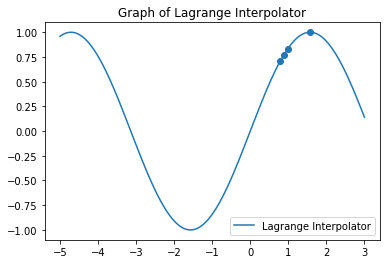

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange( -5,3,.0001)
plt.scatter(choosenInputs,Outputs)
plt.plot(x, np.sin(x))
plt.title('Graph of Lagrange Interpolator')
plt.legend(['Lagrange Interpolator'])

plt.show()

Now, it's time for us to convert the lagrange Interpolator into an anoynomous function. Anynomous function does not have name and the arguments are already passed. Let's see out first root near 0.



In [ ]:
lint = lambda x: lagrangeInterpolator(choosenInputs,Outputs,x)
falsePosition(lint,pi/2,-pi/3,20000)

0.029307164708091676

In [ ]:
falsePosition(lint,-3,-5,20000)

-4.932753991709081

In [ ]:
falsePosition(lint,3,1,20000)

[2.798688286258241, 2.7986882862582405]